<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

 /Users/mark.obrien/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: RuntimeWarning:More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

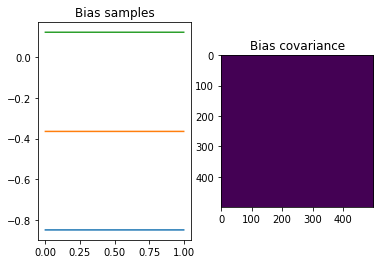

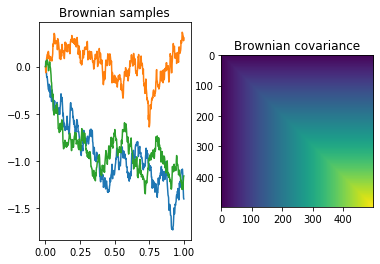

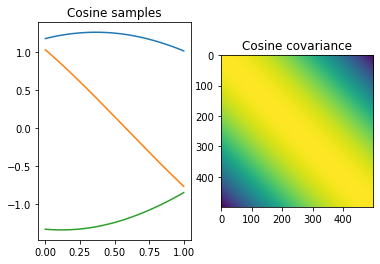

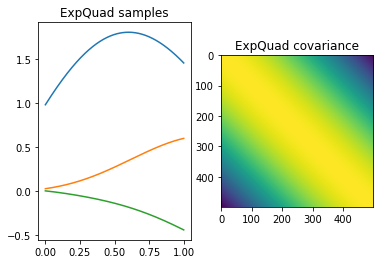

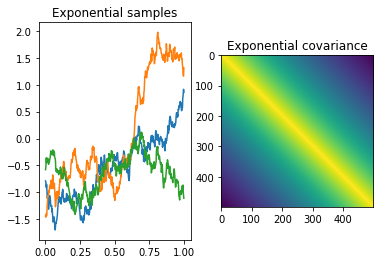

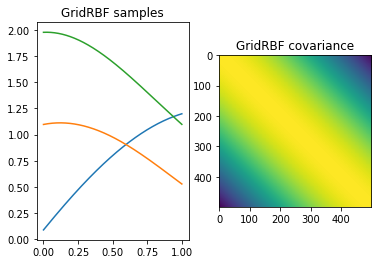

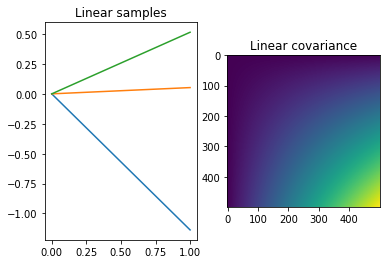

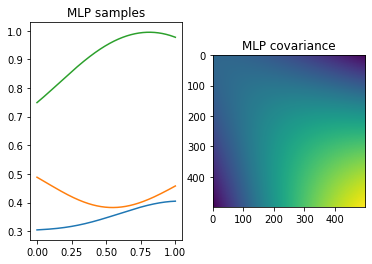

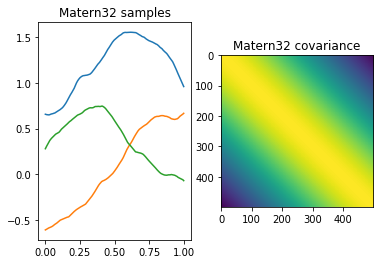

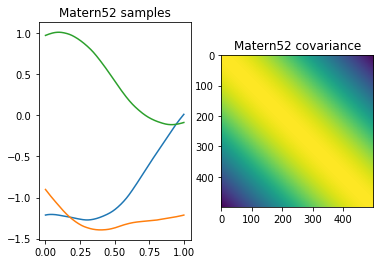

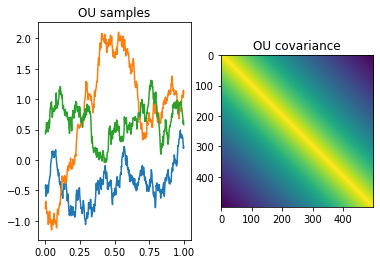

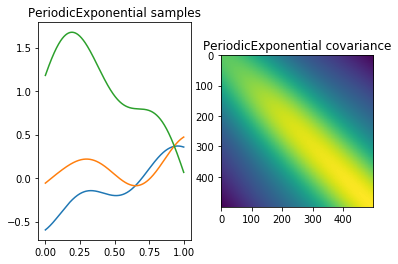

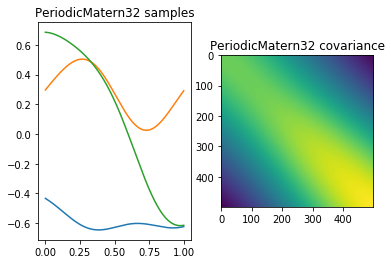

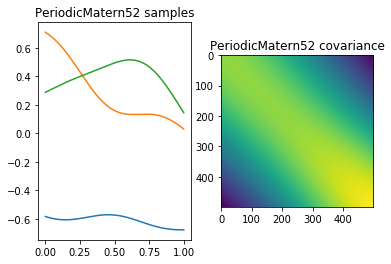

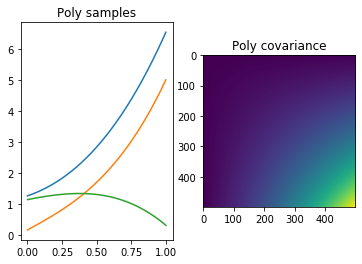

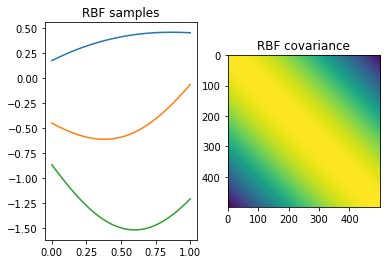

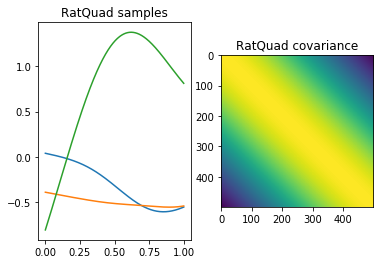

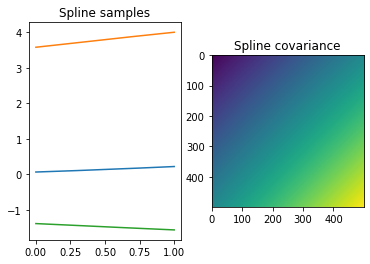

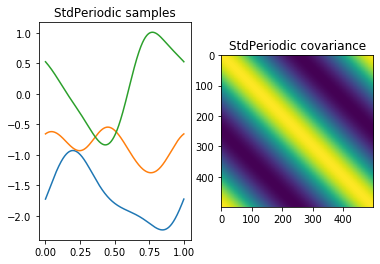

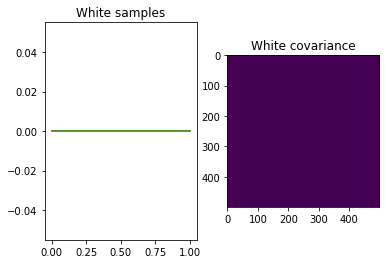

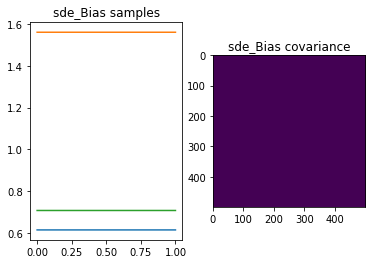

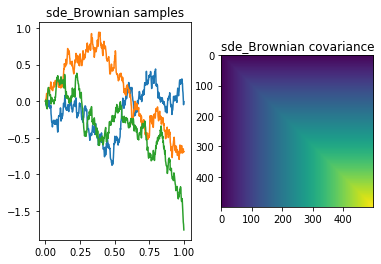

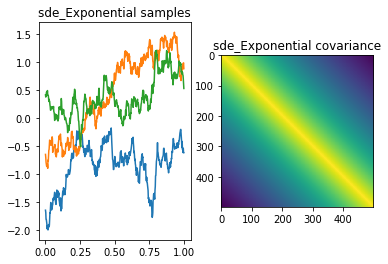

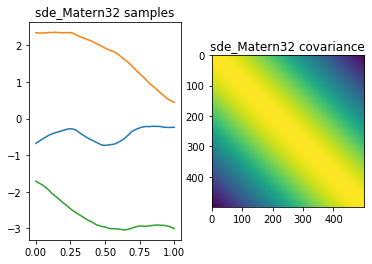

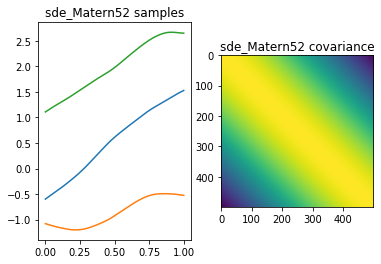

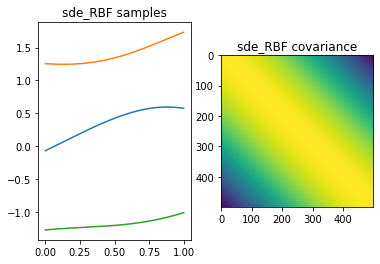

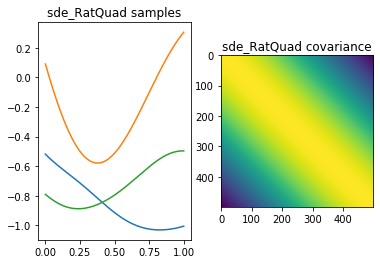

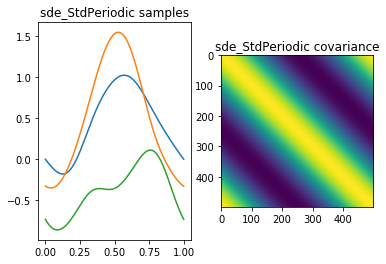

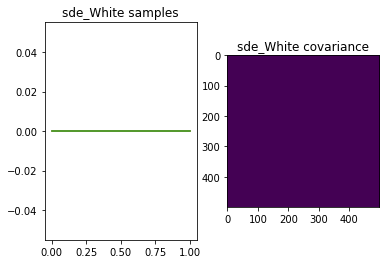

In [4]:
import numpy as np
import matplotlib
import pylab as pl   # the matplotlib for plotting
from matplotlib import pyplot as plt
import GPy
import re
from IPython.display import Math, display #This will display the equation of the kernel in picture form

def get_equation(kern):
    match = re.search(r'(math::)(\r\n|\r|\n)*(?P<equation>.*)(\r\n|\r|\n)*', kern.__doc__)
    return '' if match is None else match.group('equation').strip()

for kernel_name in dir(GPy.kern):
    Kernel = getattr(GPy.kern, kernel_name)
    
    if Kernel.__class__ == GPy.kern.Exponential.__class__ == GPy.kern.src.kernel_slice_operations.KernCallsViaSlicerMeta:
        # Try plotting sample paths here
        try:
            k = Kernel(input_dim=1)
            
            X = np.linspace(0.,1.,500) # define X to be 500 points evenly spaced over [0,1]
            X = X[:,None] # reshape X to make it n*p --- we try to use 'design matrices' in GPy 

            mu = np.zeros((500))# vector of the means --- we could use a mean function here, but here it is just zero.
            C = k.K(X,X) # compute the covariance matrix associated with inputs X

            # Generate 20 separate samples paths from a Gaussian with mean mu and covariance C
            Z = np.random.multivariate_normal(mu,C,20)

                        
            kernel_equation = get_equation(k)
            #print kernel_equation
            from IPython.display import Math, display
            display(Math(kernel_equation))
            
            fig = plt.figure()     # open a new plotting window
            plt.subplot(121)
            for i in range(3):
                plt.plot(X[:],Z[i,:])

            plt.title('{} samples'.format(kernel_name))
            
            plt.subplot(122)
            plt.imshow(C, interpolation='nearest')
            plt.title('{} covariance'.format(kernel_name))
        except:
            continue